In [1]:
import pandas as pd


In [2]:
data = pd.read_csv(r'data-sample/TaxiData-Sample', header = None)
data


,0,1,2,3,4,5
0,22271,22:54:04,114.167000,22.718399,0,0
1,22271,18:26:26,114.190598,22.647800,0,4
2,22271,18:35:18,114.201401,22.649700,0,0
3,22271,16:02:46,114.233498,22.725901,0,24
4,22271,21:41:17,114.233597,22.720900,0,19
...,...,...,...,...,...,...
1601302,23873,20:20:03,114.160149,22.606934,0,0
1601303,23873,20:15:13,114.164551,22.605118,1,48
1601304,23873,20:16:23,114.168015,22.606083,0,0
1601305,23873,20:16:43,114.168015,22.606083,0,0


In [3]:
import geopandas as gpd

In [8]:
GDF = gpd.read_file(r'./shapefile/sz.shp')

<AxesSubplot:>

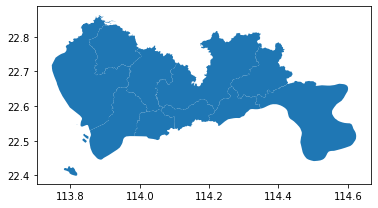

In [6]:
GDF.plot()

In [3]:
import pandas as pd
icdata = pd.read_csv(r'ICdata/SPTCC-20150401-sample.csv', header=None)

In [5]:
icdata.columns = ['ID', 'date', 'time', 'stop', 'mode', 'price', 'type']

In [6]:
icdata

,ID,date,time,stop,mode,price,type
0,100405844,2015-04-01,12:43:24,11号线祁连山路,地铁,4.0,非优惠
1,100405844,2015-04-01,18:22:04,11号线枫桥路,地铁,3.0,非优惠
2,100405844,2015-04-01,08:21:18,2号线娄山关路,地铁,3.0,非优惠
3,100405844,2015-04-01,12:07:31,2号线娄山关路,地铁,0.0,非优惠
4,100405844,2015-04-01,18:08:42,11号线祁连山路,地铁,0.0,非优惠
...,...,...,...,...,...,...,...
442855,2301108266,2015-04-01,23:48:21,2号线中山公园,地铁,4.0,非优惠
442856,2301108266,2015-04-01,23:06:45,2号线虹桥火车站,地铁,0.0,非优惠
442857,2104162123,2015-04-01,23:48:07,2号线中山公园,地铁,4.0,非优惠
442858,2104162123,2015-04-01,23:18:16,2号线虹桥火车站,地铁,0.0,非优惠


In [8]:
icdata.groupby('mode').count()

,ID,date,time,stop,price,type
mode,,,,,,
P+R停车场,113,113,113,113,113,113
公交,77151,77151,77151,77151,77151,77151
出租,4481,4481,4481,4481,4481,4481
地铁,360873,360873,360873,360873,360873,360873
轮渡,242,242,242,242,242,242


In [11]:
icdata = icdata[icdata['mode'] == '地铁']

In [12]:
icdata

,ID,date,time,stop,mode,price,type
0,100405844,2015-04-01,12:43:24,11号线祁连山路,地铁,4.0,非优惠
1,100405844,2015-04-01,18:22:04,11号线枫桥路,地铁,3.0,非优惠
2,100405844,2015-04-01,08:21:18,2号线娄山关路,地铁,3.0,非优惠
3,100405844,2015-04-01,12:07:31,2号线娄山关路,地铁,0.0,非优惠
4,100405844,2015-04-01,18:08:42,11号线祁连山路,地铁,0.0,非优惠
...,...,...,...,...,...,...,...
442855,2301108266,2015-04-01,23:48:21,2号线中山公园,地铁,4.0,非优惠
442856,2301108266,2015-04-01,23:06:45,2号线虹桥火车站,地铁,0.0,非优惠
442857,2104162123,2015-04-01,23:48:07,2号线中山公园,地铁,4.0,非优惠
442858,2104162123,2015-04-01,23:18:16,2号线虹桥火车站,地铁,0.0,非优惠


In [13]:
icdata['stop'].iloc[0]

'11号线祁连山路'

In [16]:
icdata['line'] = icdata['stop'].apply(lambda r:r[:(r.find('线')+1)])
icdata['station'] = icdata['stop'].apply(lambda r:r[(r.find('线')+1):])
icdata

C:\Users\26541\AppData\Local\Temp\ipykernel_12864\3083834282.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  icdata['line'] = icdata['stop'].apply(lambda r:r[:(r.find('线')+1)])
C:\Users\26541\AppData\Local\Temp\ipykernel_12864\3083834282.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  icdata['station'] = icdata['stop'].apply(lambda r:r[(r.find('线')+1):])


,ID,date,time,stop,mode,price,type,line,station
0,100405844,2015-04-01,12:43:24,11号线祁连山路,地铁,4.0,非优惠,11号线,祁连山路
1,100405844,2015-04-01,18:22:04,11号线枫桥路,地铁,3.0,非优惠,11号线,枫桥路
2,100405844,2015-04-01,08:21:18,2号线娄山关路,地铁,3.0,非优惠,2号线,娄山关路
3,100405844,2015-04-01,12:07:31,2号线娄山关路,地铁,0.0,非优惠,2号线,娄山关路
4,100405844,2015-04-01,18:08:42,11号线祁连山路,地铁,0.0,非优惠,11号线,祁连山路
...,...,...,...,...,...,...,...,...,...
442855,2301108266,2015-04-01,23:48:21,2号线中山公园,地铁,4.0,非优惠,2号线,中山公园
442856,2301108266,2015-04-01,23:06:45,2号线虹桥火车站,地铁,0.0,非优惠,2号线,虹桥火车站
442857,2104162123,2015-04-01,23:48:07,2号线中山公园,地铁,4.0,非优惠,2号线,中山公园
442858,2104162123,2015-04-01,23:18:16,2号线虹桥火车站,地铁,0.0,非优惠,2号线,虹桥火车站


In [20]:
icdata = icdata.sort_values(['ID', 'date', 'time'])

In [23]:
for col in icdata.columns:
    icdata[col+'1'] = icdata[col].shift(-1)
    

In [24]:
icdata

,ID,date,time,stop,mode,price,type,line,station,ID1,date1,time1,stop1,mode1,price1,type1,line1,station1
334427,82024,2015-04-01,08:48:25,8号线西藏北路,地铁,0.0,非优惠,8号线,西藏北路,8.202400e+04,2015-04-01,09:07:29,10号线江湾体育场,地铁,4.0,非优惠,10号线,江湾体育场
334426,82024,2015-04-01,09:07:29,10号线江湾体育场,地铁,4.0,非优惠,10号线,江湾体育场,8.895700e+04,2015-04-01,15:46:58,3号线宜山路,地铁,0.0,非优惠,3号线,宜山路
381022,88957,2015-04-01,15:46:58,3号线宜山路,地铁,0.0,非优惠,3号线,宜山路,8.895700e+04,2015-04-01,16:20:58,3号线东宝兴路,地铁,4.0,非优惠,3号线,东宝兴路
381021,88957,2015-04-01,16:20:58,3号线东宝兴路,地铁,4.0,非优惠,3号线,东宝兴路,9.931300e+04,2015-04-01,08:26:26,8号线延吉中路,地铁,0.0,非优惠,8号线,延吉中路
376286,99313,2015-04-01,08:26:26,8号线延吉中路,地铁,0.0,非优惠,8号线,延吉中路,9.931300e+04,2015-04-01,09:07:27,9号线打浦桥,地铁,4.0,非优惠,9号线,打浦桥
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218391,4000039067,2015-04-01,07:32:48,5号线颛桥,地铁,1.0,优惠,5号线,颛桥,4.000040e+09,2015-04-01,18:11:15,2号线南京西路,地铁,0.0,非优惠,2号线,南京西路
373585,4000039743,2015-04-01,18:11:15,2号线南京西路,地铁,0.0,非优惠,2号线,南京西路,4.000040e+09,2015-04-01,18:28:44,10号线交通大学,地铁,3.0,非优惠,10号线,交通大学
373584,4000039743,2015-04-01,18:28:44,10号线交通大学,地铁,3.0,非优惠,10号线,交通大学,4.000041e+09,2015-04-01,08:48:34,4号线上海体育场,地铁,0.0,非优惠,4号线,上海体育场
171701,4000040665,2015-04-01,08:48:34,4号线上海体育场,地铁,0.0,非优惠,4号线,上海体育场,4.000041e+09,2015-04-01,09:16:55,10号线南京东路,地铁,4.0,非优惠,10号线,南京东路


In [25]:
icdata = icdata[icdata['ID'] == icdata['ID1']]

In [26]:
icdata

,ID,date,time,stop,mode,price,type,line,station,ID1,date1,time1,stop1,mode1,price1,type1,line1,station1
334427,82024,2015-04-01,08:48:25,8号线西藏北路,地铁,0.0,非优惠,8号线,西藏北路,8.202400e+04,2015-04-01,09:07:29,10号线江湾体育场,地铁,4.0,非优惠,10号线,江湾体育场
381022,88957,2015-04-01,15:46:58,3号线宜山路,地铁,0.0,非优惠,3号线,宜山路,8.895700e+04,2015-04-01,16:20:58,3号线东宝兴路,地铁,4.0,非优惠,3号线,东宝兴路
376286,99313,2015-04-01,08:26:26,8号线延吉中路,地铁,0.0,非优惠,8号线,延吉中路,9.931300e+04,2015-04-01,09:07:27,9号线打浦桥,地铁,4.0,非优惠,9号线,打浦桥
376283,99313,2015-04-01,09:07:27,9号线打浦桥,地铁,4.0,非优惠,9号线,打浦桥,9.931300e+04,2015-04-01,18:09:51,9号线打浦桥,地铁,0.0,非优惠,9号线,打浦桥
376285,99313,2015-04-01,18:09:51,9号线打浦桥,地铁,0.0,非优惠,9号线,打浦桥,9.931300e+04,2015-04-01,18:46:06,8号线延吉中路,地铁,4.0,非优惠,8号线,延吉中路
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234887,4000038121,2015-04-01,09:05:42,1号线人民广场,地铁,3.0,优惠,1号线,人民广场,4.000038e+09,2015-04-01,21:32:28,1号线人民广场,地铁,0.0,非优惠,1号线,人民广场
234889,4000038121,2015-04-01,21:32:28,1号线人民广场,地铁,0.0,非优惠,1号线,人民广场,4.000038e+09,2015-04-01,22:12:52,13号线金运路,地铁,4.0,非优惠,13号线,金运路
218392,4000039067,2015-04-01,07:22:58,5号线剑川路,地铁,0.0,非优惠,5号线,剑川路,4.000039e+09,2015-04-01,07:32:48,5号线颛桥,地铁,1.0,优惠,5号线,颛桥
373585,4000039743,2015-04-01,18:11:15,2号线南京西路,地铁,0.0,非优惠,2号线,南京西路,4.000040e+09,2015-04-01,18:28:44,10号线交通大学,地铁,3.0,非优惠,10号线,交通大学


In [27]:
icdata = icdata[(icdata['price'] == 0) & (icdata['price1'] > 0)]

In [28]:
icdata

,ID,date,time,stop,mode,price,type,line,station,ID1,date1,time1,stop1,mode1,price1,type1,line1,station1
334427,82024,2015-04-01,08:48:25,8号线西藏北路,地铁,0.0,非优惠,8号线,西藏北路,8.202400e+04,2015-04-01,09:07:29,10号线江湾体育场,地铁,4.0,非优惠,10号线,江湾体育场
381022,88957,2015-04-01,15:46:58,3号线宜山路,地铁,0.0,非优惠,3号线,宜山路,8.895700e+04,2015-04-01,16:20:58,3号线东宝兴路,地铁,4.0,非优惠,3号线,东宝兴路
376286,99313,2015-04-01,08:26:26,8号线延吉中路,地铁,0.0,非优惠,8号线,延吉中路,9.931300e+04,2015-04-01,09:07:27,9号线打浦桥,地铁,4.0,非优惠,9号线,打浦桥
376285,99313,2015-04-01,18:09:51,9号线打浦桥,地铁,0.0,非优惠,9号线,打浦桥,9.931300e+04,2015-04-01,18:46:06,8号线延吉中路,地铁,4.0,非优惠,8号线,延吉中路
6062,116435,2015-04-01,12:24:49,4号线大连路,地铁,0.0,非优惠,4号线,大连路,1.164350e+05,2015-04-01,12:56:16,3号线中山公园,地铁,3.0,优惠,3号线,中山公园
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234888,4000038121,2015-04-01,08:19:28,13号线金运路,地铁,0.0,非优惠,13号线,金运路,4.000038e+09,2015-04-01,09:05:42,1号线人民广场,地铁,3.0,优惠,1号线,人民广场
234889,4000038121,2015-04-01,21:32:28,1号线人民广场,地铁,0.0,非优惠,1号线,人民广场,4.000038e+09,2015-04-01,22:12:52,13号线金运路,地铁,4.0,非优惠,13号线,金运路
218392,4000039067,2015-04-01,07:22:58,5号线剑川路,地铁,0.0,非优惠,5号线,剑川路,4.000039e+09,2015-04-01,07:32:48,5号线颛桥,地铁,1.0,优惠,5号线,颛桥
373585,4000039743,2015-04-01,18:11:15,2号线南京西路,地铁,0.0,非优惠,2号线,南京西路,4.000040e+09,2015-04-01,18:28:44,10号线交通大学,地铁,3.0,非优惠,10号线,交通大学


In [30]:
metrood = icdata[['ID', 'date', 'time', 'line', 'station', 'time1', 'line1', 'station1', 'price1']]

In [32]:
metrood.columns = ['ID', 'date', 'stime', 'sline', 'sstation', 'etime', 'eline', 'estation', 'price']

In [33]:
metrood

,ID,date,stime,sline,sstation,etime,eline,estation,price
334427,82024,2015-04-01,08:48:25,8号线,西藏北路,09:07:29,10号线,江湾体育场,4.0
381022,88957,2015-04-01,15:46:58,3号线,宜山路,16:20:58,3号线,东宝兴路,4.0
376286,99313,2015-04-01,08:26:26,8号线,延吉中路,09:07:27,9号线,打浦桥,4.0
376285,99313,2015-04-01,18:09:51,9号线,打浦桥,18:46:06,8号线,延吉中路,4.0
6062,116435,2015-04-01,12:24:49,4号线,大连路,12:56:16,3号线,中山公园,3.0
...,...,...,...,...,...,...,...,...,...
234888,4000038121,2015-04-01,08:19:28,13号线,金运路,09:05:42,1号线,人民广场,3.0
234889,4000038121,2015-04-01,21:32:28,1号线,人民广场,22:12:52,13号线,金运路,4.0
218392,4000039067,2015-04-01,07:22:58,5号线,剑川路,07:32:48,5号线,颛桥,1.0
373585,4000039743,2015-04-01,18:11:15,2号线,南京西路,18:28:44,10号线,交通大学,3.0


In [34]:
metrood.to_csv(r'od_csv', index = None)

In [36]:
metrood['hour'] = metrood['stime'].apply(lambda r:r[:2])

C:\Users\26541\AppData\Local\Temp\ipykernel_12864\3499713116.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metrood['hour'] = metrood['stime'].apply(lambda r:r[:2])


In [37]:
metrood

,ID,date,stime,sline,sstation,etime,eline,estation,price,hour
334427,82024,2015-04-01,08:48:25,8号线,西藏北路,09:07:29,10号线,江湾体育场,4.0,08
381022,88957,2015-04-01,15:46:58,3号线,宜山路,16:20:58,3号线,东宝兴路,4.0,15
376286,99313,2015-04-01,08:26:26,8号线,延吉中路,09:07:27,9号线,打浦桥,4.0,08
376285,99313,2015-04-01,18:09:51,9号线,打浦桥,18:46:06,8号线,延吉中路,4.0,18
6062,116435,2015-04-01,12:24:49,4号线,大连路,12:56:16,3号线,中山公园,3.0,12
...,...,...,...,...,...,...,...,...,...,...
234888,4000038121,2015-04-01,08:19:28,13号线,金运路,09:05:42,1号线,人民广场,3.0,08
234889,4000038121,2015-04-01,21:32:28,1号线,人民广场,22:12:52,13号线,金运路,4.0,21
218392,4000039067,2015-04-01,07:22:58,5号线,剑川路,07:32:48,5号线,颛桥,1.0,07
373585,4000039743,2015-04-01,18:11:15,2号线,南京西路,18:28:44,10号线,交通大学,3.0,18


In [43]:
od = metrood.groupby(['hour', 'sstation', 'estation'])['ID'].count().rename('count').reset_index()

In [45]:
stop = pd.read_csv(r'ICdata/stop.csv')

In [46]:
stop

,stationnames,linename,lon,lat
0,富锦路,地铁1号线(富锦路-莘庄),121.420012,31.394078
1,友谊西路,地铁1号线(富锦路-莘庄),121.423351,31.382958
2,宝安公路,地铁1号线(富锦路-莘庄),121.426290,31.371680
3,共富新村,地铁1号线(富锦路-莘庄),121.429462,31.356866
4,呼兰路,地铁1号线(富锦路-莘庄),121.433107,31.341553
...,...,...,...,...
1033,三鲁公路,轨道交通浦江线(沈杜公路-汇臻路),121.523211,31.058207
1034,闵瑞路,轨道交通浦江线(沈杜公路-汇臻路),121.526112,31.050321
1035,浦航路,轨道交通浦江线(沈杜公路-汇臻路),121.526392,31.043280
1036,东城一路,轨道交通浦江线(沈杜公路-汇臻路),121.527925,31.032497


In [52]:
stop = stop.drop_duplicates(subset=['stationnames'])

In [54]:
stop = stop[['stationnames', 'lon', 'lat']]

In [55]:
stop

,stationnames,lon,lat
0,富锦路,121.420012,31.394078
1,友谊西路,121.423351,31.382958
2,宝安公路,121.426290,31.371680
3,共富新村,121.429462,31.356866
4,呼兰路,121.433107,31.341553
...,...,...,...
1026,汇臻路,121.520338,31.027464
1027,东城一路,121.527925,31.032497
1028,浦航路,121.526392,31.043280
1029,闵瑞路,121.526112,31.050321


In [56]:
stop.columns= ['sstation', 'slon', 'slat']

In [57]:
stop

,sstation,slon,slat
0,富锦路,121.420012,31.394078
1,友谊西路,121.423351,31.382958
2,宝安公路,121.426290,31.371680
3,共富新村,121.429462,31.356866
4,呼兰路,121.433107,31.341553
...,...,...,...
1026,汇臻路,121.520338,31.027464
1027,东城一路,121.527925,31.032497
1028,浦航路,121.526392,31.043280
1029,闵瑞路,121.526112,31.050321


In [59]:
od = pd.merge(od, stop , how='left')
od

,hour,sstation,estation,count,slon,slat
0,04,上海南站,翔殷路,2,121.425219,31.156776
1,04,常熟路,新闸路,1,121.446706,31.215520
2,04,漕宝路,汶水路,1,121.430295,31.170290
3,05,七宝,打浦桥,1,121.344981,31.157312
4,05,七宝,新村路,1,121.344981,31.157312
...,...,...,...,...,...,...
117939,23,静安寺,中山公园,1,121.441679,31.225084
117940,23,静安寺,娄山关路,1,121.441679,31.225084
117941,23,马陆,马陆,1,121.272419,31.321604
117942,23,黄陂南路,外环路,1,121.468740,31.224756


In [60]:
stop.columns = ['estation', 'elon', 'elat']
od = pd.merge(od, stop)

In [61]:

od

,hour,sstation,estation,count,slon,slat,elon,elat
0,04,上海南站,翔殷路,2,121.425219,31.156776,121.527669,31.307069
1,05,宝安公路,翔殷路,1,121.426290,31.371680,121.527669,31.307069
2,05,惠南,翔殷路,1,121.757390,31.055897,121.527669,31.307069
3,05,芦恒路,翔殷路,1,121.493729,31.121204,121.527669,31.307069
4,06,上海南站,翔殷路,1,121.425219,31.156776,121.527669,31.307069
...,...,...,...,...,...,...,...,...
115952,18,南京东路,殷高东路,1,121.479244,31.239115,121.502559,31.323881
115953,18,同济大学,殷高东路,1,121.502067,31.284578,121.502559,31.323881
115954,18,江湾体育场,殷高东路,1,121.509692,31.305049,121.502559,31.323881
115955,19,嘉定北,殷高东路,1,121.233044,31.393510,121.502559,31.323881


In [62]:
od.to_csv(r'od_count.csv', index=None)